#### Распределить банки на группы по величине уставного капитала, по активам, по капиталу, построить гистограммы и полигон частот. Сохранить полученные группировки в виде DataFrame.

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data=pd.read_excel("https://github.com/junaart/ForStudents/blob/master/Big_Data/Seminar_6/data.xlsx?raw=true",engine="openpyxl")
data

,Номер банка,Капитал,Работающие активы,Уставной капитал
0,1,20.7,11.7,2.4
1,2,19.9,19.8,17.5
2,3,9.3,2.6,2.7
3,4,59.3,43.6,2.1
4,5,24.7,29.0,23.1
5,6,47.7,98.5,18.7
6,7,24.2,25.6,5.3
7,8,7.8,6.2,2.2
8,9,38.3,79.8,6.8
9,10,10.3,10.1,3.5


In [9]:
p=np.histogram(data['Уставной капитал'], bins='fd')
print(list(p[0]), list(p[1]))

[17, 6, 4, 3] [2.1, 7.35, 12.6, 17.85, 23.1]


In [24]:
import math
arr=[0]*len(p[1])
for i in range(len(p[1])-1):
    arr[i]=str(math.ceil(p[1][i]))+' - '+str(math.floor(p[1][i+1]))

pd.Series(p[0].astype('int'), index=arr[:-1])

3 - 7      17
8 - 12      6
13 - 17     4
18 - 23     3
dtype: int32

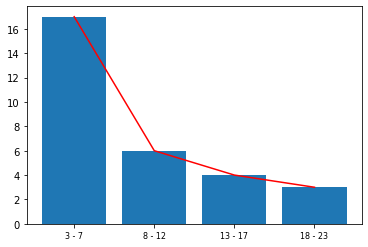

In [11]:
plt.bar(arr[:-1], p[0].astype('int'))
plt.xticks(fontsize=8)
plt.plot(arr[:-1], p[0].astype('int'), color='red')

In [11]:
p=np.histogram(data['Работающие активы'], bins='fd')
print(list(p[0]), list(p[1]))

[13, 8, 2, 2, 3, 2] [2.6, 23.450000000000003, 44.300000000000004, 65.15, 86.0, 106.85, 127.7]


In [12]:
arr=[0]*len(p[1])
for i in range(len(p[1])-1):
    arr[i]=str(math.ceil(p[1][i]))+' - '+str(math.floor(p[1][i+1]))

pd.Series(p[0].astype('int'), index=arr[:-1])

3 - 23       13
24 - 44       8
45 - 65       2
66 - 86       2
86 - 106      3
107 - 127     2
dtype: int32

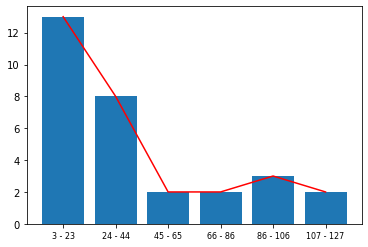

In [13]:
plt.bar(arr[:-1], p[0].astype('int'))
plt.xticks(fontsize=8)
plt.plot(arr[:-1], p[0].astype('int'), color='red')

In [14]:
p=np.histogram(data['Капитал'], bins='fd')
print(list(p[0]), list(p[1]))

[13, 8, 4, 4, 1] [6.8, 20.46, 34.12, 47.78, 61.44, 75.1]


In [15]:
arr=[0]*len(p[1])
for i in range(len(p[1])-1):
    arr[i]=str(math.ceil(p[1][i]))+' - '+str(math.floor(p[1][i+1]))

pd.Series(p[0].astype('int'), index=arr[:-1])

7 - 20     13
21 - 34     8
35 - 47     4
48 - 61     4
62 - 75     1
dtype: int32

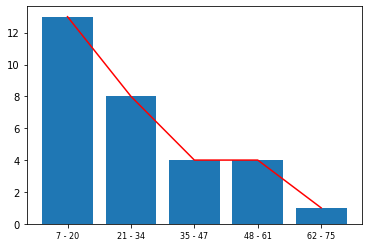

In [16]:
plt.bar(arr[:-1], p[0].astype('int'))
plt.xticks(fontsize=8)
plt.plot(arr[:-1], p[0].astype('int'), color='red')

#### Определить объемные показатели по каждой группе при группировке по величине уставного капитала: суммарные, средние работающие активы группы, а также размах вариации, среднее линейное отклонение, межквартильный размах внутри каждой группы. Результаты расчета оформить в виде DataFrame с его последующим сохранением.

In [56]:
p=np.histogram(data['Уставной капитал'], bins='fd')
newd=pd.DataFrame(columns=['Sum','Avg','R','d','imq','Sigma','KV'])
for i in range(len(p[0])):
    d=data[(p[1][i]<=data['Уставной капитал']) & (data['Уставной капитал']<p[1][i+1])]['Работающие активы']
    summa=d.sum()
    avg=d.mean()
    r=d.max()-d.min()
    srl=(d - d.mean()).abs().sum() / d.std()
    mr=np.quantile(d, 0.75)-np.quantile(d, 0.25)
    s=d.std()
    kv=s/avg*100
    
    res=pd.Series([summa,avg,r,srl,mr,s,kv], index=newd.columns)
    newd=newd.append(res,ignore_index=True)
    #newd.index[i]='group'+str(i)
    
newd

,Sum,Avg,R,d,imq,Sigma,KV
0,451.4,26.552941,77.2,12.476717,20.000,21.541301,81.125857
1,343.9,57.316667,118.6,4.824295,66.525,47.578626,83.010107
2,227.4,56.850000,104.4,2.862816,43.650,47.051567,82.764411
3,188.9,94.450000,8.1,1.414214,4.050,5.727565,6.064124


In [16]:
data[(p[1][0]<=data['Уставной капитал']) & (data['Уставной капитал']<p[1][1])]['Работающие активы']

0     11.7
2      2.6
3     43.6
6     25.6
7      6.2
8     79.8
9     10.1
12    16.7
14    31.7
16    21.4
17    41.1
19    10.9
21    22.6
22    11.7
23    27.3
24    70.2
28    18.2
Name: Работающие активы, dtype: float64

#### Определить объемные показатели по каждой группе при группировке по капиталу: суммарный, средний, медианный капитал, а также дисперсию, среднее квадратическое отклонение, среднее линейное отклонение от медианного значения, относительные показатели вариации: коэффициент осцилляции, коэффициент вариации внутри каждой группы. Результаты расчета оформить в виде DataFrame с его последующим сохранением.

In [54]:
p=np.histogram(data['Капитал'], bins=4)
newd=pd.DataFrame(columns=['Sum','Avg','Median','Dispersion','Sigma','d_Median','KO','KV'])
for i in range(len(p[0])):
    d=data[(p[1][i]<=data['Капитал']) & (data['Капитал']<p[1][i+1])]['Капитал']
    summa=d.sum()
    avg=d.mean()
    med=d.median()
    s=d.std()
    dis=s**2
    dmed=(d - med).abs().sum() / d.std()
    ko=(d.max()-d.min())/avg*100
    kv=s/avg*100
    
    res=pd.Series([summa,avg,med,s,dis,dmed,ko,kv], index=newd.columns)
    newd=newd.append(res,ignore_index=True)
    #newd.index[i]='group'+str(i)
    
newd

,Sum,Avg,Median,Dispersion,Sigma,d_Median,KO,KV
0,263.9,14.661111,14.20,5.813285,33.794281,15.671002,113.906783,39.651053
1,146.9,29.380000,24.70,7.021182,49.297000,3.674595,48.672566,23.897829
2,201.2,50.300000,51.75,7.053604,49.753333,3.232390,29.224652,14.023070
3,120.0,60.000000,60.00,0.989949,0.980000,1.414214,2.333333,1.649916


#### Рассчитать средние показатели и показатели вариации по несгруппированным данным: среднее арифметическое, среднее геометрическое, среднее геометрическое, медиана, дисперию, среднее квадратическое отклонение, коэффициент вариации по показателям капитала, уставного капитала, работающих активов. Построить для них диаграмму "ящик с усами" Сделать выводы об однородности статистических совокупностей. Сравнить показатели вариации на несгруппированной совокупности с показателями вариации на сгруппированных совокупностях.

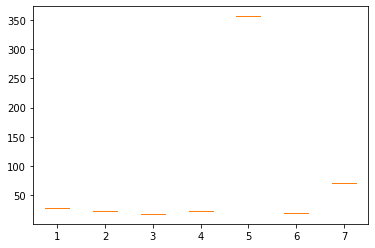

{'whiskers': [<matplotlib.lines.Line2D at 0x9508adbeb0>,
 'caps': [<matplotlib.lines.Line2D at 0x9508ae4610>,
 'boxes': [<matplotlib.lines.Line2D at 0x9508adbbe0>],
 'medians': [<matplotlib.lines.Line2D at 0x9508ae4d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x9508af0100>],
 'means': []}

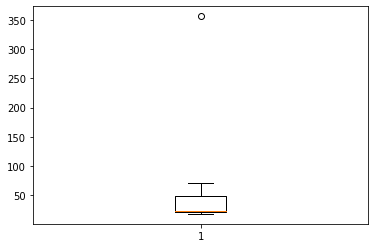

In [71]:
import statistics as stats
newdd=pd.DataFrame(columns=['Avg','AvgG','AvgH','Median','Sigma','Dispersion','KV'])

avg=data['Капитал'].mean()
avggeom=stats.geometric_mean(data['Капитал'])
avgharm=stats.harmonic_mean(data['Капитал'])
med=data['Капитал'].median()
s=data['Капитал'].std()
dis=s**2
kv=s/avg*100

newdd=newdd.append(pd.Series([avg,avggeom,avgharm,med,dis,s,kv], index=newdd.columns),ignore_index=True)

plt.boxplot(newdd)
plt.show()
plt.boxplot([avg,avggeom,avgharm,med,dis,s,kv])